In [59]:
import pandas as pd
import numpy as np

from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet

from dateutil.relativedelta import relativedelta, FR
from datetime import datetime

In [60]:

## Utility to group dates by week. Get the "Last Friday" (arbitrary)
def last_friday(the_date):
    the_dt = datetime.strptime(the_date, '%Y-%m-%d')
    return the_dt + relativedelta(weekday=FR(-1))
    


In [61]:
# Grab the NTSB data
df = pd.read_csv('AviationData.csv')

In [62]:
# Apply group by week function

df['ds'] = df['Event.Date'].apply(lambda x: last_friday(x))

In [63]:
# Get counts and make it Prophet friendly

vals = df.groupby("ds")['ds'].count()
vals_df = pd.DataFrame({'ds':vals.index, 'y':vals.values})

In [64]:
vals_df

,ds,y
0,1948-10-22,1
1,1962-07-13,1
2,1974-08-30,1
3,1977-06-17,1
4,1979-07-27,1
...,...,...
2044,2021-01-15,8
2045,2021-01-22,12
2046,2021-01-29,8
2047,2021-02-05,9


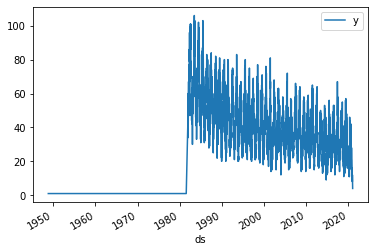

In [65]:
# Show a raw plot from beginning of time
vals_df.plot(x='ds', y='y')

In [66]:
# The real data starts at around year y2k
vals_filtered = vals_df[(vals_df['ds'] > '2000-01-01') & (vals_df['ds'] < '2021-07-01')]


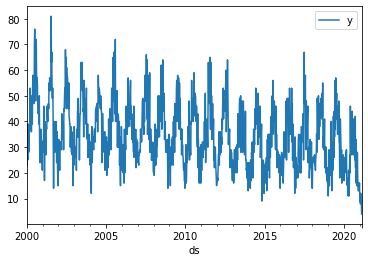

In [67]:
# Plot the filtered data
vals_filtered.plot(x='ds', y='y')

In [68]:
# fit the model
model = Prophet()
model.fit(vals_filtered)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
# Create a future dataframe going out 1 year
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1462,2022-02-08
1463,2022-02-09
1464,2022-02-10
1465,2022-02-11
1466,2022-02-12


In [70]:
# Predict!
forecast = model.predict(future)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



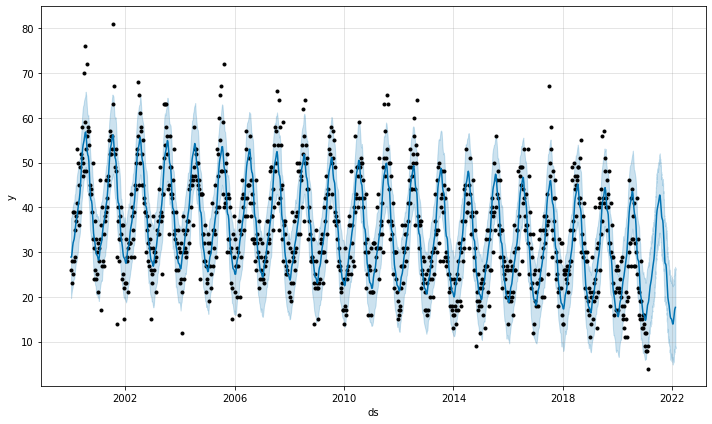

In [71]:
# Plot the prediction
fig1 = model.plot(forecast)
